# Lec12. Matplotlib

* matplotlib.org
* pip install matplotlib
* 시각화

In [2]:
# ! pip install matplotlib

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

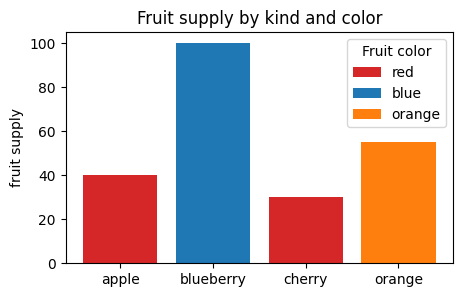

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,3))

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange'] 
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

[]

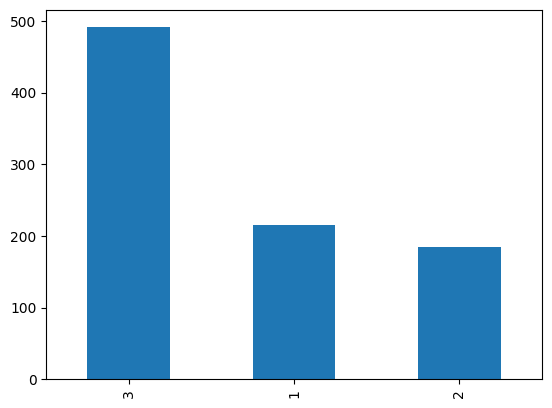

In [8]:
titanic = train['pclass'].value_counts().plot(kind = 'bar')
titanic.plot()

In [7]:
train=pd.read_csv('./titanic/train.csv')
train.head()
train.columns = train.columns.str.lower()

In [17]:
train['pclass'].value_counts()

array([491, 216, 184], dtype=int64)

In [5]:
train['pclass'].value_counts().index.values.tolist()

[3, 1, 2]

In [6]:
train['pclass'].value_counts().values.tolist()

[491, 216, 184]

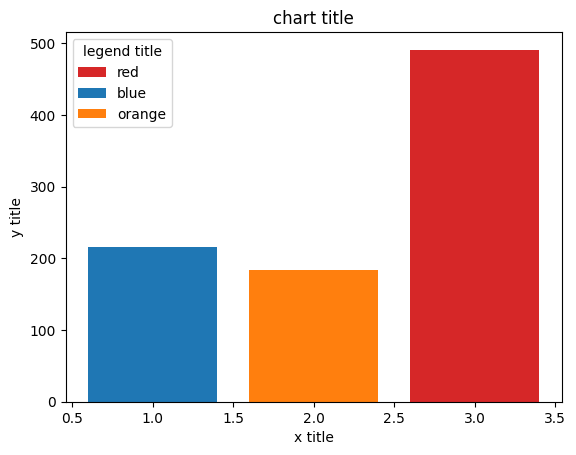

In [20]:

fig, ax = plt.subplots()

x = train['pclass'].value_counts().index.values.tolist()
y = train['pclass'].value_counts().values.tolist()
x_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=x_labels, color=bar_colors)

ax.set_ylabel('y title')
ax.set_xlabel('x title')
ax.set_title('chart title')
ax.legend(title='legend title')

plt.show()

# DataFrame.plot() vs matplotlib.pyplot.plot()

In [16]:
df = pd.DataFrame({'subject':["kor",'eng','math']
                   ,'score':[77,99,44]
                   ,'code':[100,200,300]
                  }) 
df.head()

,subject,score,code
0,kor,77,100
1,eng,99,200
2,math,44,300


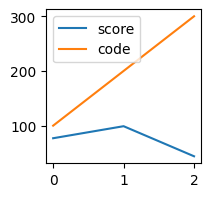

In [29]:
# df.plot('subject','score', kind ='bar' )
#df.plot('x축','y축', kind ='그래프종류' )
df.plot(figsize = (2,2))
# 모든 수치 표현
plt.show()

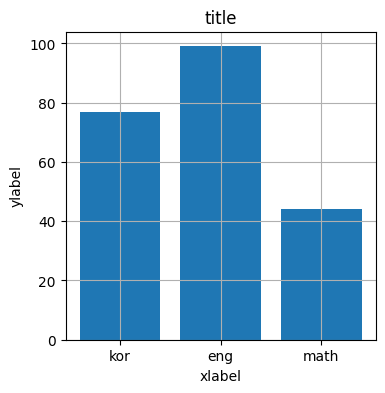

In [33]:
# matplotlib.pyplot.plot.bar(df['subject'],df['score'])
plt.figure(figsize=(4,4))
plt.bar(df['subject'],df['score'])
#----------------------------------------------------------------
plt.title ('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.grid()
#----------------------------------------------------------------
plt.show()

# subplot() vs subplots()
* plt.subplot(row,col,idx)
* plt.subplots(nrows, ncols)

## Subplot()

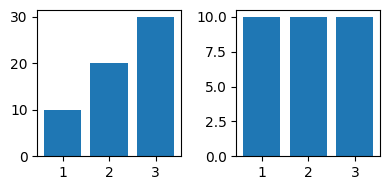

In [41]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.bar([1,2,3],[10,20,30])
plt.subplot(1,2,2)
plt.bar([1,2,3],[10,10,10])
plt.tight_layout()
plt.show()

## Subplots()

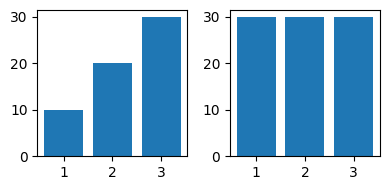

In [53]:
fig, axes =  plt.subplots(nrows=1,ncols=2,figsize=(4,2))
axes[0].bar([1,2,3],[10,20,30])
axes[1].bar([1,2,3],[30,30,30])
plt.tight_layout()
plt.show()

# 이중 차트

In [ ]:
# plt.rcParams['figure.figsize'] = (4,2)
# 해당 쥬피터에선 figsize 일괄적용

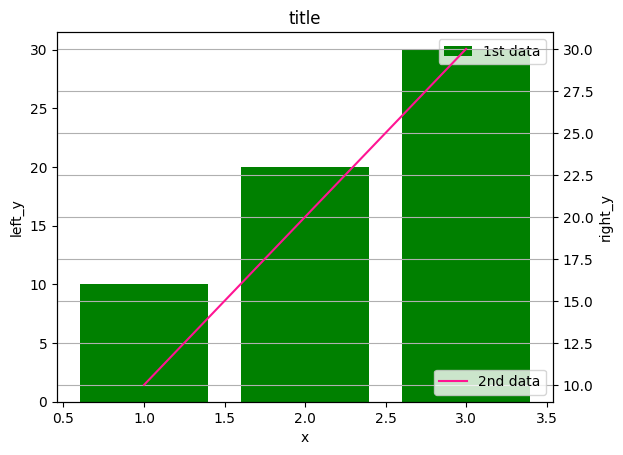

In [69]:
fig, ax1 = plt.subplots()
ax1.bar([1,2,3],[10,20,30], color = 'green', label = '1st data')
ax1.set_ylabel('left_y')
ax1.set_xlabel('x')
ax1.legend(loc = 'upper right')


ax2 = ax1.twinx()
ax2.plot([1,2,3],[10,20,30], color = 'deeppink', label = '2nd data')
ax2.set_ylabel('right_y')
ax2.legend(loc = 'lower right')
plt.title('title')

plt.grid()
plt.show()

## 4분위 이상치(Outlier) 탐지(IQR방식)

https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FboDTe4%2FbtqHP3beJxg%2F8mzOK0wWK31QXpaY7VDJRk%2Fimg.png

In [101]:
df = pd.DataFrame([1,3,   9,11,12,15,16,14,19,13,11,15,16,23,   77,80]
                 ,columns = ['score'])
q1 = df['score'].quantile(q=0.25)
q2 = df['score'].quantile(q=0.5)
q3 = df['score'].quantile(q=0.75)

IQR = q3-q1
print(q1,q2,q3,IQR)
# 11.0/ 14.5 /16.75 /5.75

v_min = q1 - (IQR *1.5) # 2.375
v_max = q3 + (IQR *1.5) # 25.375
print(v_min, v_max)



11.0 14.5 16.75 5.75
2.375 25.375


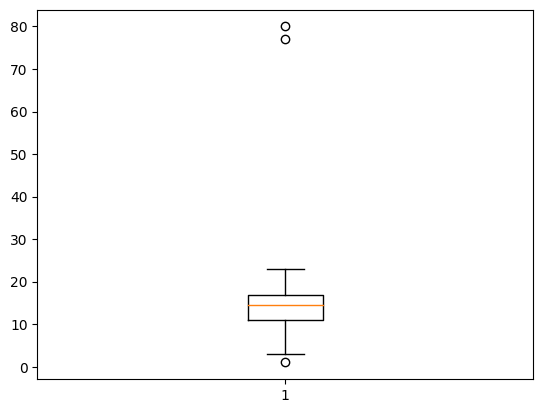

In [97]:
plt.boxplot(df['score'])
plt.show()

## 이상치

1) v_min, v_max값으로 맞춘다
2) 드롭한다
3) abnomality detection용일때는 유용(금융:패턴과 다른 거래/의료:질병감지/산불감지)

충분히 협의를 거치고 목적에 따라 처리

In [ ]:
[(df['score']<v_min) | (df['score']>v_max)]

# boxplot()

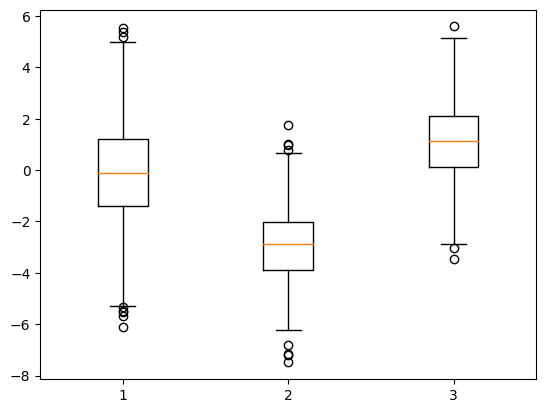

In [70]:
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

plt.boxplot([data_a,data_b,data_c])
plt.show()
# 최대 최소 넘어간 동그라미는 이상치( 혼자 동떨어짐 )